In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from pose_graph_partitioning.pose_graph import *
plt.rc("figure", figsize=(10,10))
import cv2

Total agents 1 keyframes 2200 edges 8647 inter edge 0 comm_vol 0


/home/xuhao/swarm_ws/src/distributed_solver/dslam_pose_graph_opti/scripts/pose_graph_partitioning/pose_graph.py:723: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection='3d')


<Axes3DSubplot:title={'center':'DGS'}, xlabel='X(m)', ylabel='Y(m)'>

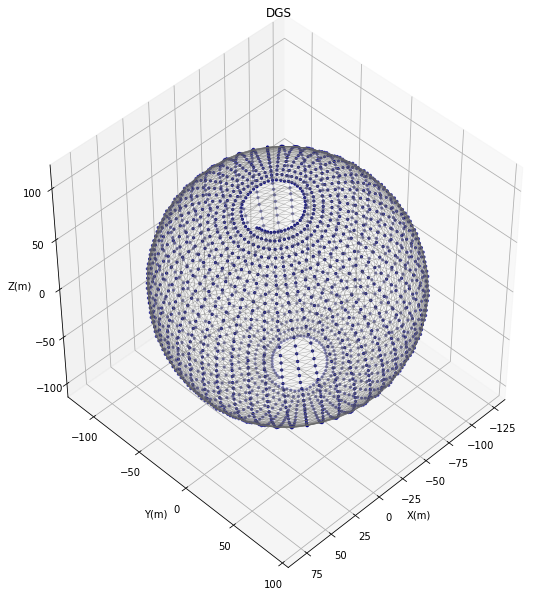

In [3]:
pg = PoseGraph()
# pg.read_g2o_single(f"/home/xuhao/data/ral2021/DSLAM/torus/mTSP/DSLAM-output/final.g2o")
pg.read_g2o_single(f"/home/xuhao/data/ral2021/DGS/sphere_bignoise_vertex3/parted-initial/fullGraph_optimized.g2o")
pg.show("DGS", axis_len=-1, show_raw_edges=False)

# pg = PoseGraph()
#pg.read_g2o_single("/home/xuhao/data/pose_graph/output/final.g2o")
#ax = pg.show("my", axis_len=0.4, show_raw_edges=False)


# pg = PoseGraph()
# pg.read_sesync_poses("/home/xuhao/source/SESync/C++/build/bin/poses.txt")
# pg.show("SE-Sync")

Total agents 10 keyframes 2200 edges 8647 inter edge 1359 comm_vol 918 keyframes 111<->329


/home/xuhao/swarm_ws/src/distributed_solver/dslam_pose_graph_opti/scripts/pose_graph_partitioning/pose_graph.py:695: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return poses, np.array(axes_x),np.array(axes_y),np.array(axes_z), kf_mc, np.array(edges_a), np.array(edges_b)-np.array(edges_a), np.array(edge_real), line_color
/home/xuhao/swarm_ws/src/distributed_solver/dslam_pose_graph_opti/scripts/pose_graph_partitioning/pose_graph.py:712: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax.set_

<Axes3DSubplot:title={'center':'initial'}, xlabel='X', ylabel='Y'>

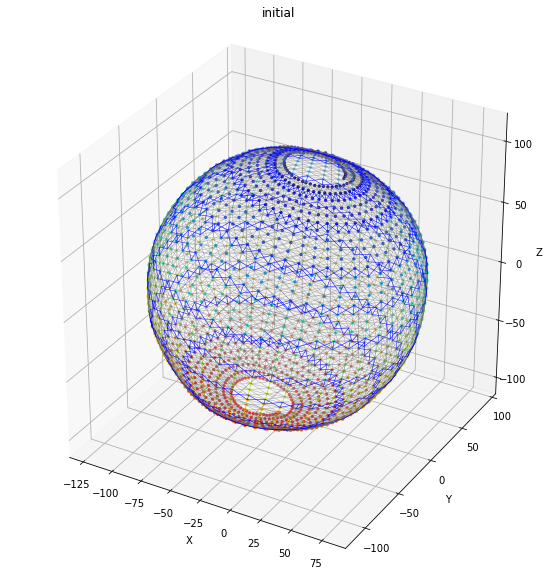

In [20]:
pg = PoseGraph()
path = "//home/xuhao/data/ral2021/DSLAM/sphere_bignoise_vertex3/parted-initial/"
pg.read_g2o_folder(path)
pg.read_g2o_single(f"/home/xuhao/data/ral2021/DGS/sphere_bignoise_vertex3/parted-initial/fullGraph_optimized.g2o", update_only=True)
pg.show("initial", axis_len=-1, show_raw_edges=False)



In [5]:
def crop_by_rate(path, crop_rate=1.0):
    img = cv2.imread(path)
    w_ = crop_rate*img.shape[0]
    h_ = crop_rate*img.shape[1]
    x0 = int((img.shape[0] - w_)/2)
    y0 = int((img.shape[1] - h_)/2)
    x1 = int((img.shape[0]+ w_)/2)
    y1 = int((img.shape[0] + h_)/2)
    img = img[y0:y1,x0:x1]
    cv2.imwrite(path, img)
    return img
    
def plot_partitioning(data_folder_dgs,  title, output_dir="", elev=45, azim=45,crop_rate=1.0):
    plt.rcParams.update({'font.size': 15})
    pg = PoseGraph()
    pg.read_g2o_folder(f"{data_folder_dgs}/mTSP/")
    pg.read_g2o_single(f"{data_folder_dgs}/mTSP-parted-proposed/fullGraph_optimized.g2o", update_only=True)
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    pg.show(title+"_baseline", show_edges=False, show_title=False, elev=elev, azim=azim,show_axis_labels=False)
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.savefig(output_dir+title+"_baseline.png")
    plt.show()
    
    img = crop_by_rate(output_dir+title+"_baseline.png", crop_rate=crop_rate)
    plt.imshow(img)
    
    pg = PoseGraph()
    pg.read_g2o_folder(f"{data_folder_dgs}/mTSP-parted-proposed/")
    pg.read_g2o_single(f"{data_folder_dgs}/mTSP-parted-proposed/fullGraph_optimized.g2o", update_only=True)
    pg.show(title+"_proposed_dgs", show_edges=False, show_title=False, elev=elev, azim=azim,show_axis_labels=False)
    plt.tight_layout()
    plt.savefig(output_dir+title+"_proposed.png")
    plt.show()
    img = crop_by_rate(output_dir+title+"_proposed.png", crop_rate=crop_rate)

#     pg = PoseGraph()
#     pg.read_g2o_folder(f"{data_folder_dslam}/mTSP-parted-proposed/")
#     pg.show(title+"_proposed_dslam", show_edges=False, show_title=False, elev=elev, azim=azim)
#     plt.tight_layout()
#     plt.savefig(output_dir+title+"_dslam_proposed.png")



Total agents 10 keyframes 5000 edges 9162 inter edge 1604 comm_vol 2703 keyframes 42<->1165


<Figure size 720x720 with 0 Axes>

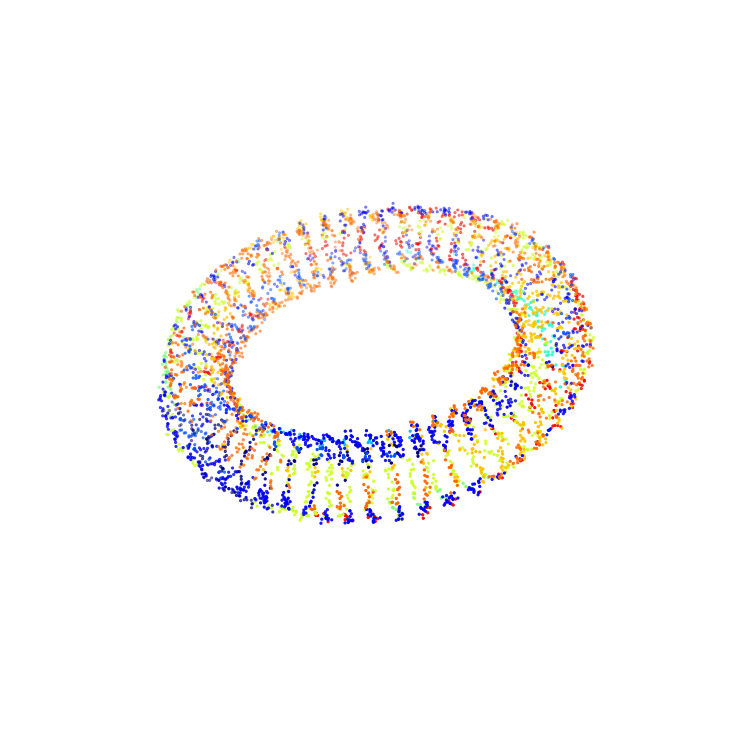

Total agents 10 keyframes 5000 edges 9163 inter edge 550 comm_vol 1036 keyframes 435<->525


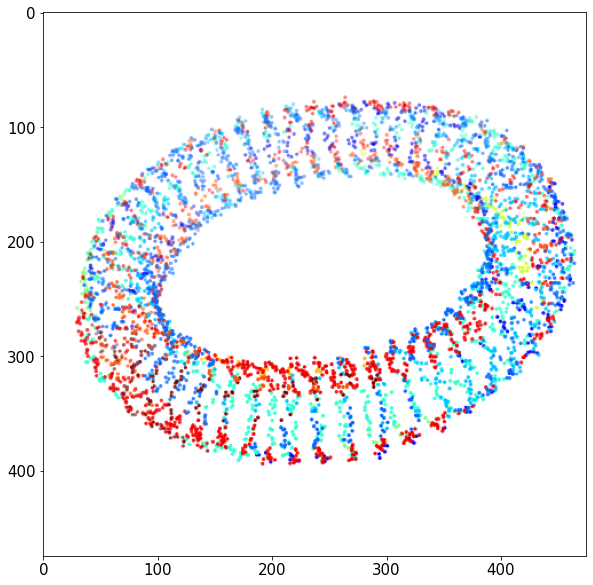

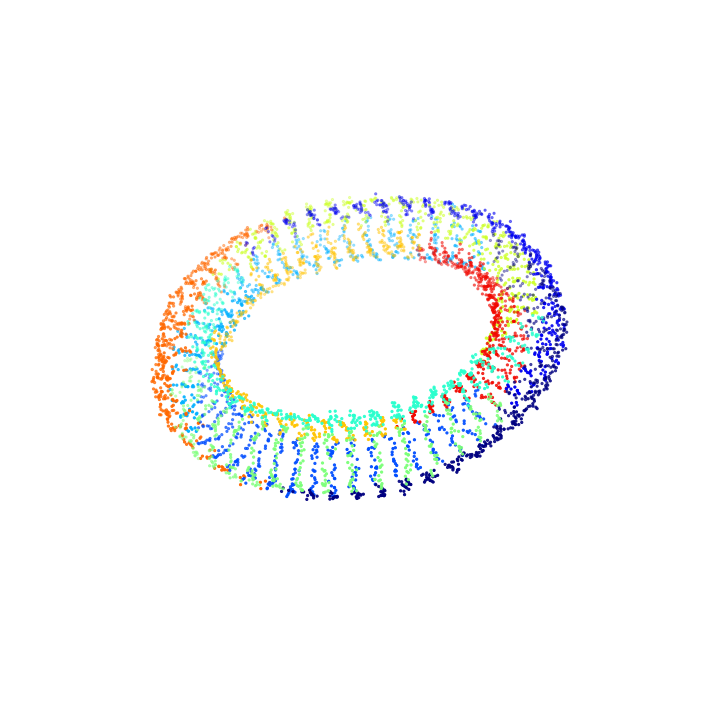

In [25]:
plot_partitioning("/home/xuhao/data/ral2021/DGS/torus",  "torus3D", output_dir="/home/xuhao/Dropbox/my_publications/RAL2022/figs/generated/", elev=-30, azim=-40, crop_rate=0.66)

Total agents 10 keyframes 8000 edges 22294 inter edge 8544 comm_vol 11514 keyframes 95<->1819


<Figure size 720x720 with 0 Axes>

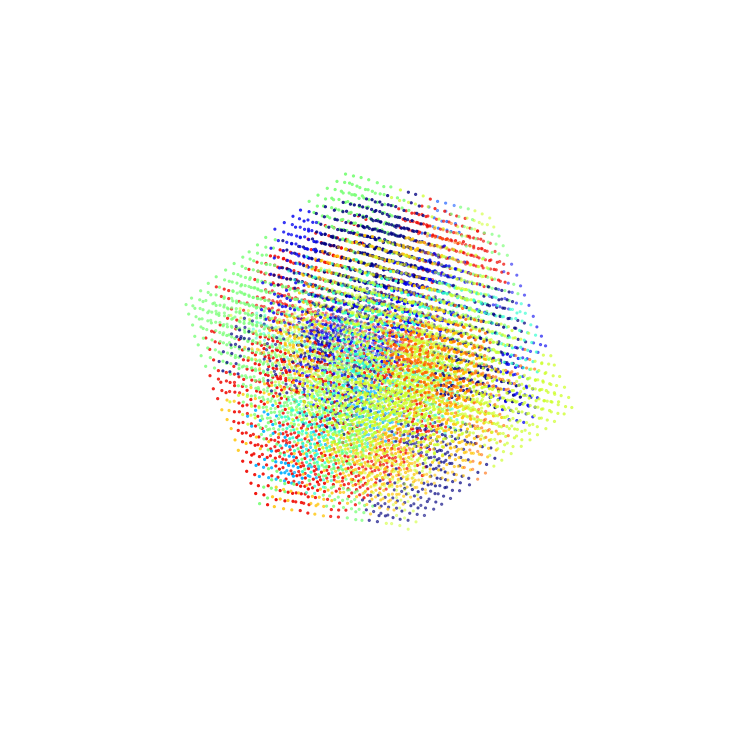

Total agents 10 keyframes 8000 edges 22294 inter edge 2036 comm_vol 3309 keyframes 739<->860


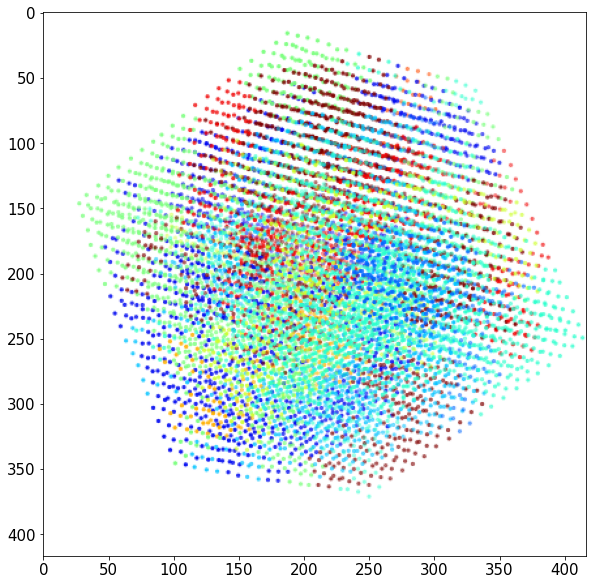

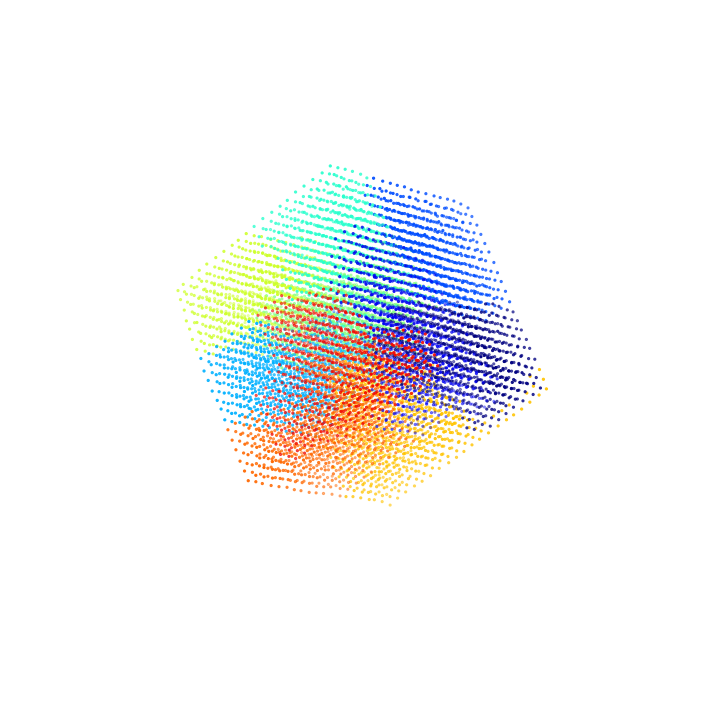

In [26]:
plot_partitioning("/home/xuhao/data/ral2021/DGS/grid3D", "grid3D", output_dir="/home/xuhao/Dropbox/my_publications/RAL2022/figs/generated/", crop_rate=0.58)

Total agents 10 keyframes 2200 edges 8662 inter edge 1665 comm_vol 1389 keyframes 80<->534


<Figure size 720x720 with 0 Axes>

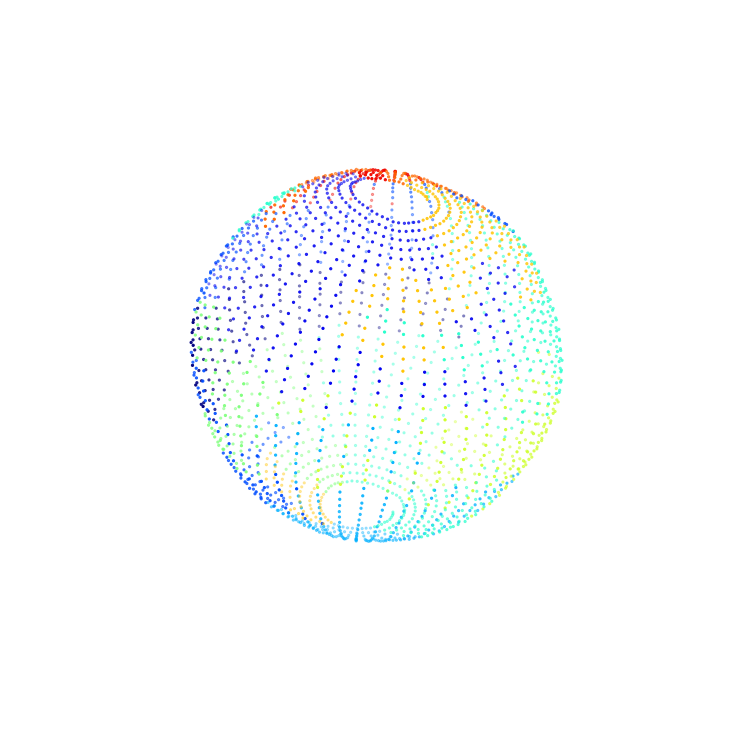

Total agents 10 keyframes 2200 edges 8662 inter edge 771 comm_vol 685 keyframes 202<->231


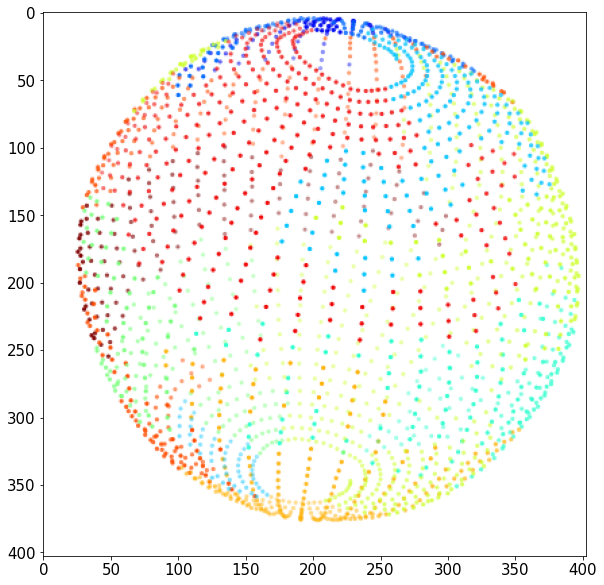

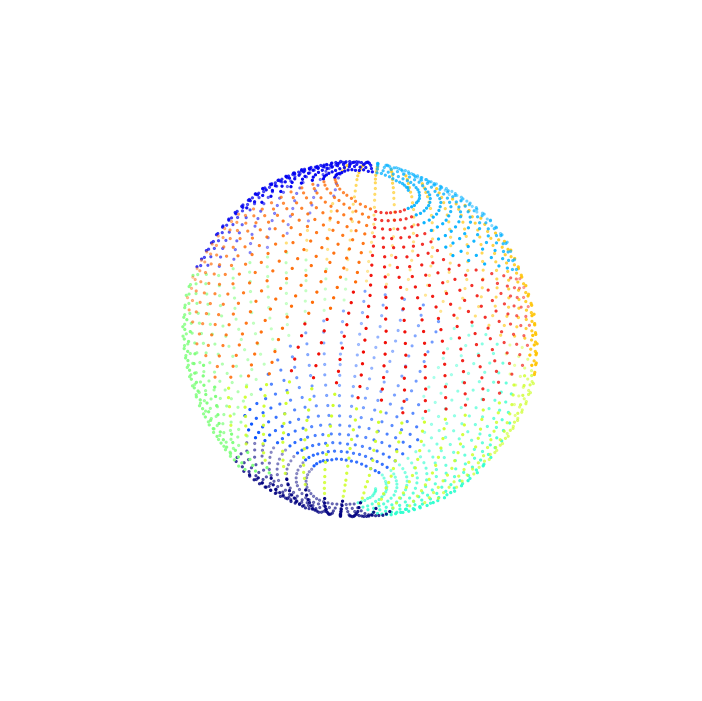

In [13]:
plot_partitioning("/home/xuhao/data/ral2021/DGS/sphere_bignoise_vertex3", "sphere", output_dir="/home/xuhao/Dropbox/my_publications/RAL2022/figs/generated/", crop_rate=0.56)

Total agents 10 keyframes 5750 edges 12593 inter edge 3333 comm_vol 4672 keyframes 20<->1357


<Figure size 720x720 with 0 Axes>

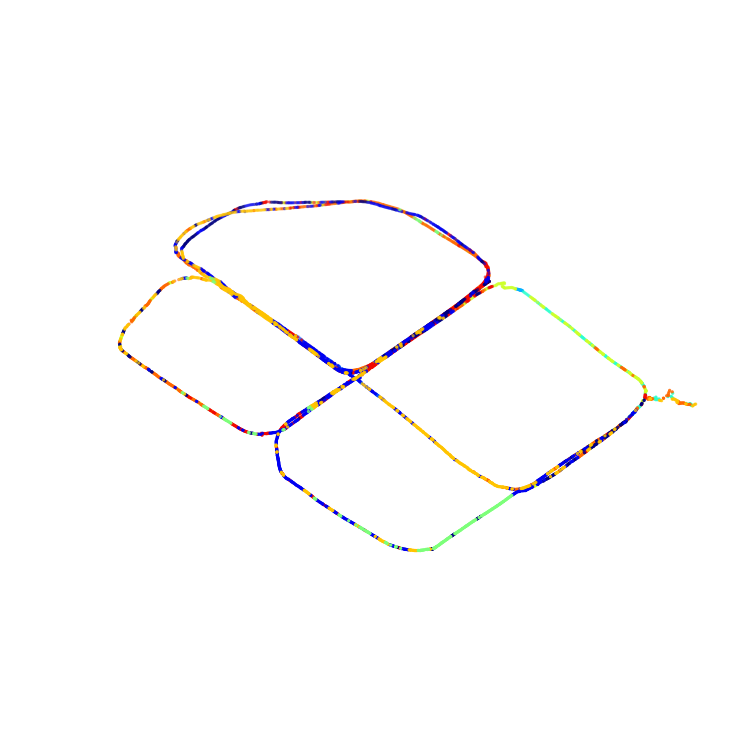

Total agents 10 keyframes 5750 edges 12594 inter edge 578 comm_vol 920 keyframes 543<->602


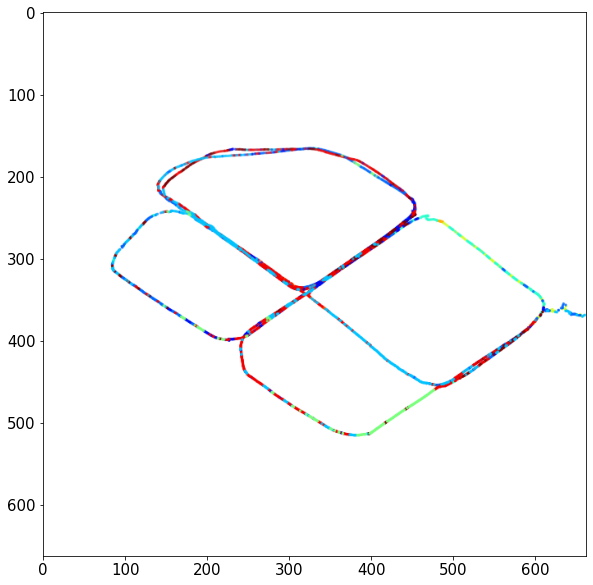

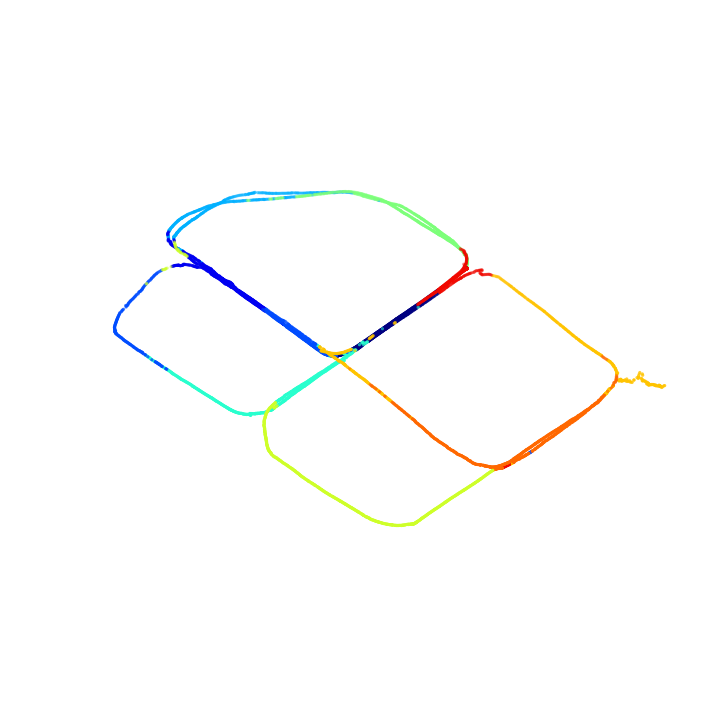

In [31]:
plot_partitioning("/home/xuhao/data/ral2021/DGS/cubicle", "cubicle", output_dir="/home/xuhao/Dropbox/my_publications/RAL2022/figs/generated/", crop_rate=0.92)

Total agents 10 keyframes 1661 edges 6305 inter edge 901 comm_vol 515 keyframes 8<->444


<Figure size 720x720 with 0 Axes>

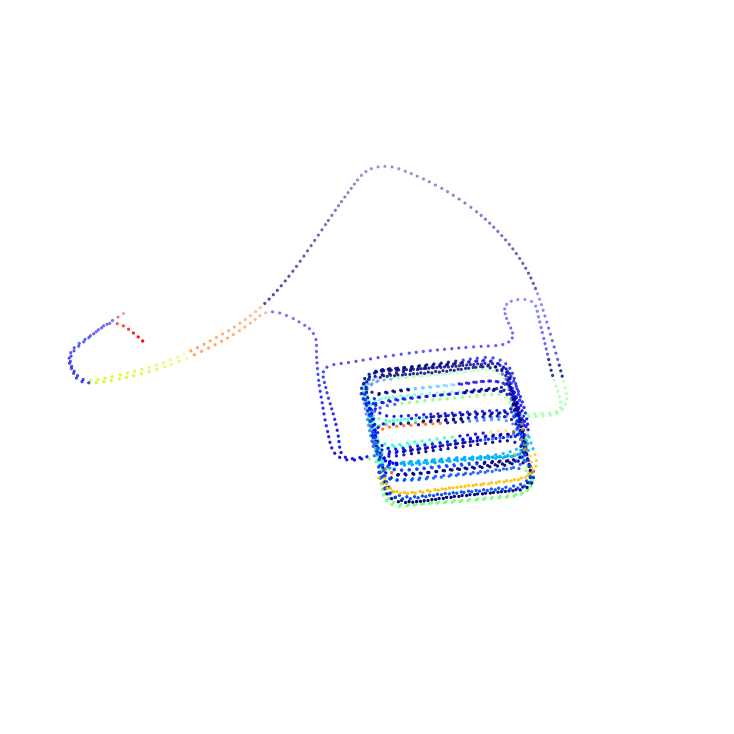

Total agents 10 keyframes 1661 edges 6306 inter edge 153 comm_vol 168 keyframes 155<->175


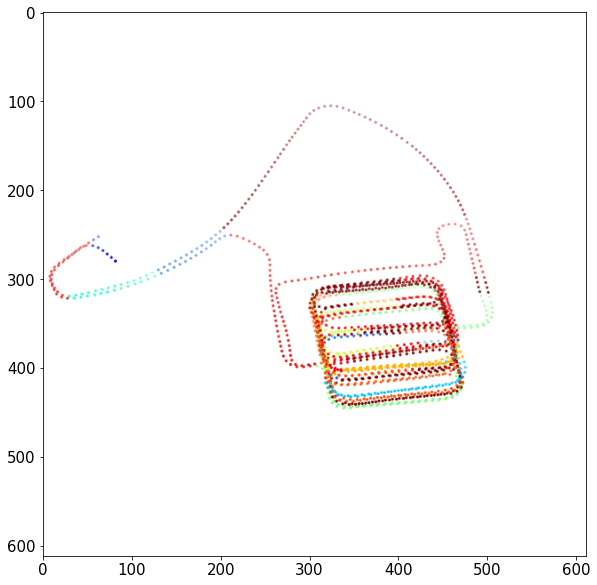

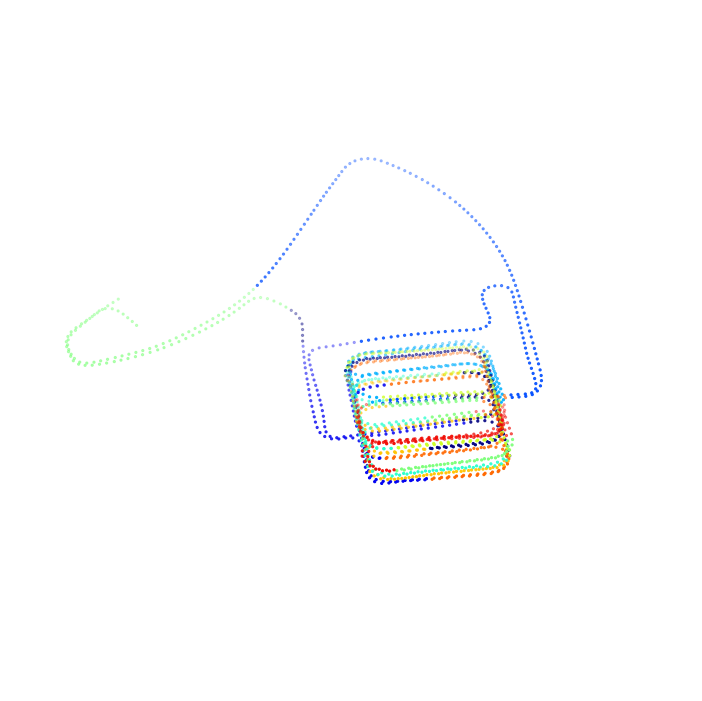

In [15]:
plot_partitioning("/home/xuhao/data/ral2021/DGS/parking-garage", "parking-garage", output_dir="/home/xuhao/Dropbox/my_publications/RAL2022/figs/generated/", crop_rate=0.85)

Total agents 10 keyframes 1228 edges 1501 inter edge 209 comm_vol 239 keyframes 6<->375


<Figure size 720x720 with 0 Axes>

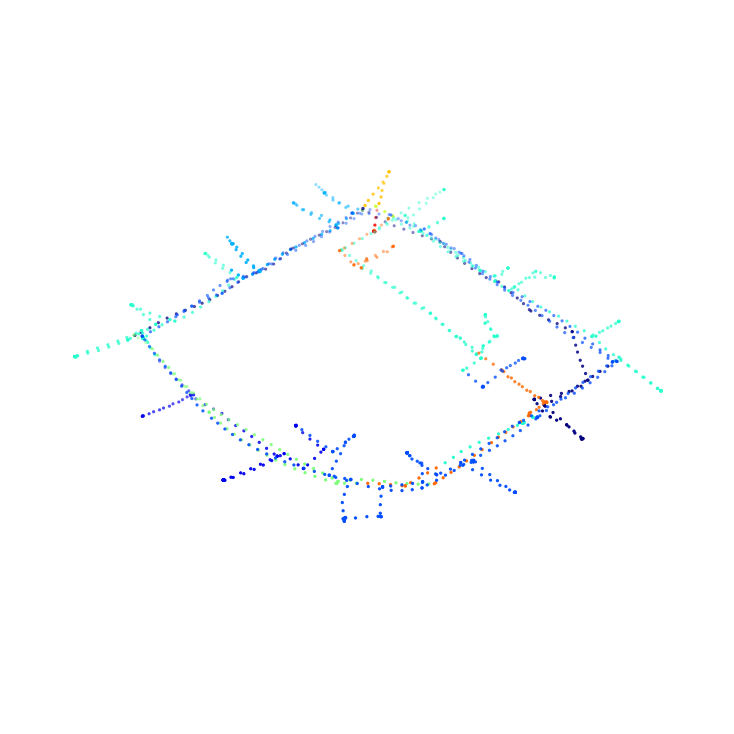

Total agents 10 keyframes 1228 edges 1504 inter edge 98 comm_vol 160 keyframes 108<->129


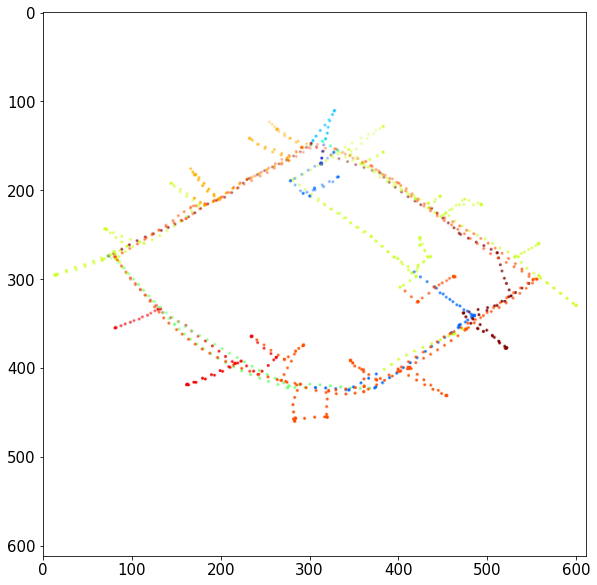

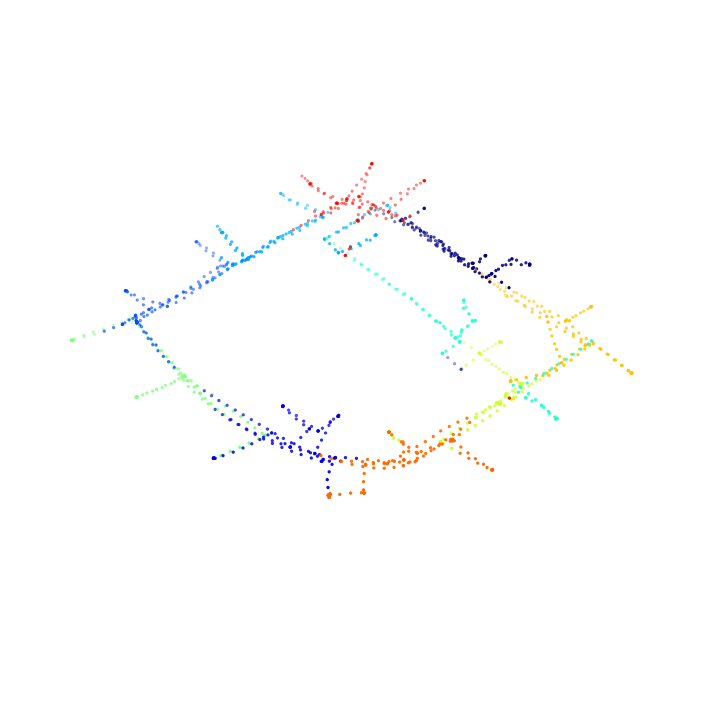

In [32]:
plot_partitioning("/home/xuhao/data/ral2021/DGS/input_INTEL_g2o", "INTEL", output_dir="/home/xuhao/Dropbox/my_publications/RAL2022/figs/generated/", crop_rate=0.85)

Total agents 10 keyframes 3500 edges 5548 inter edge 1065 comm_vol 1769 keyframes 12<->1057


<Figure size 720x720 with 0 Axes>

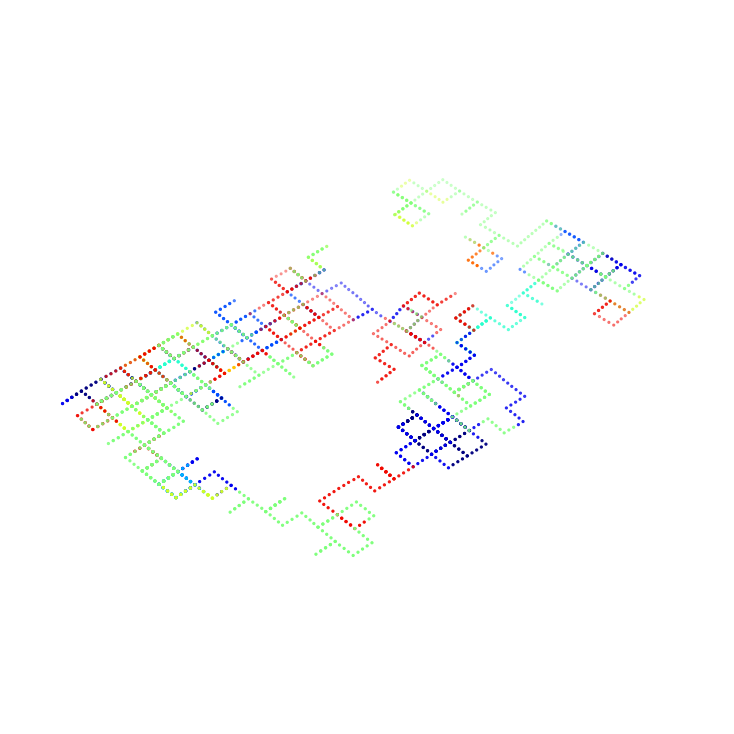

Total agents 10 keyframes 3500 edges 5551 inter edge 257 comm_vol 488 keyframes 313<->366


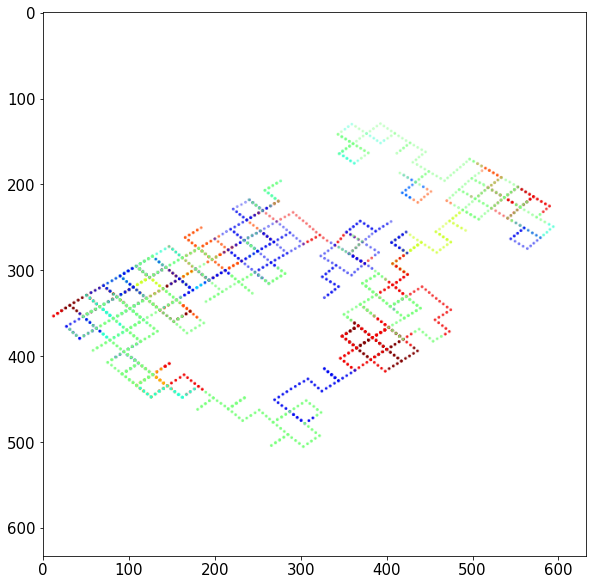

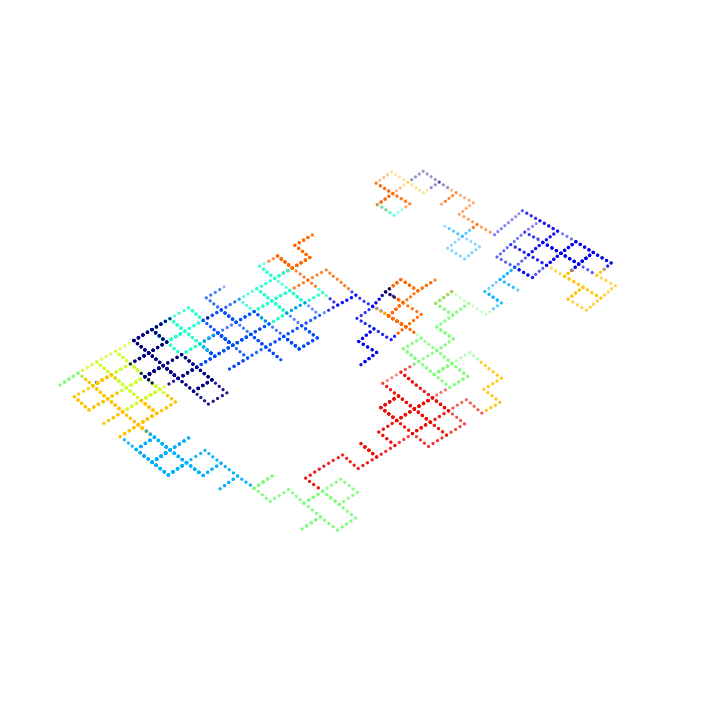

In [35]:
plot_partitioning("/home/xuhao/data/ral2021/DGS/input_M3500_g2o", "M3500", output_dir="/home/xuhao/Dropbox/my_publications/RAL2022/figs/generated/", crop_rate=0.88)

Total agents 10 keyframes 808 edges 836 inter edge 35 comm_vol 70 keyframes 10<->183


<Figure size 720x720 with 0 Axes>

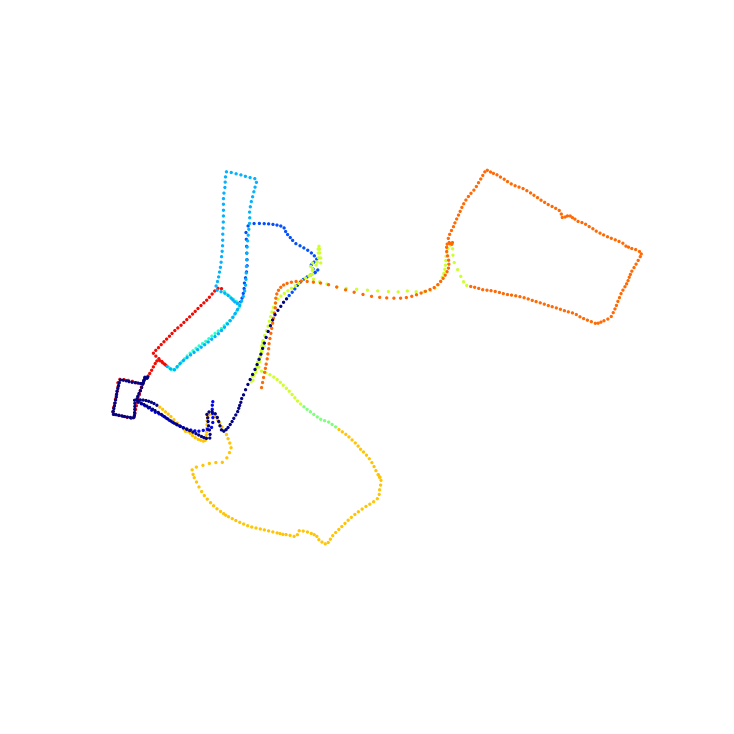

Total agents 10 keyframes 808 edges 839 inter edge 27 comm_vol 54 keyframes 78<->84


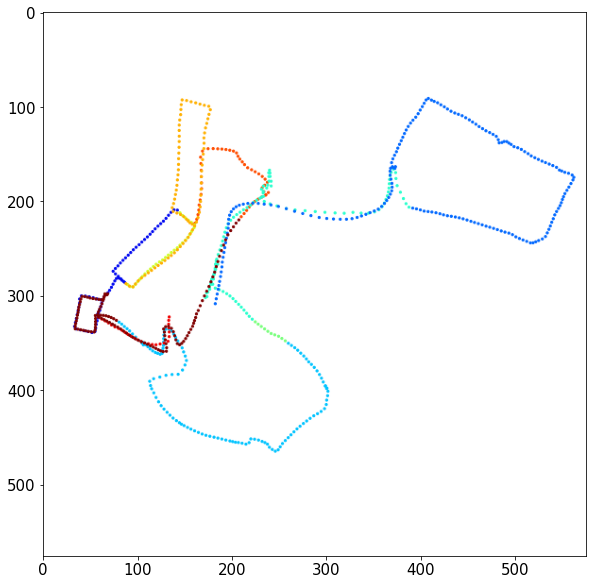

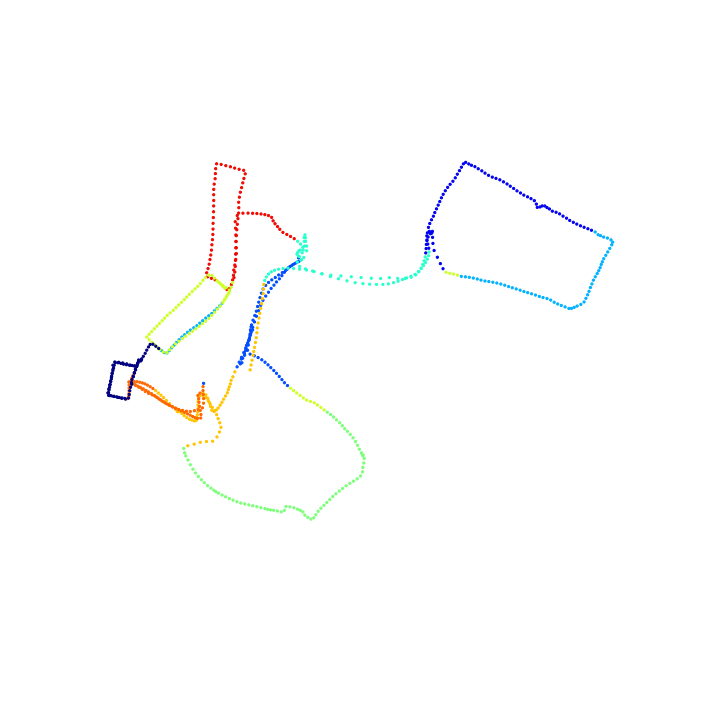

In [13]:
plot_partitioning("/home/xuhao/data/ral2021/DGS/input_MITb_g2o", "MIT", output_dir="/home/xuhao/Dropbox/my_publications/RAL2022/figs/generated/", crop_rate=0.8,elev=90, azim=0)